In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2 as cv
import keras
from keras import layers, utils
from keras.datasets import fashion_mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
import sys, os, random

# Datos

## Usando las imágenes ordenadas por defecto

In [13]:
PATH = "images"

def get_data(foldername:str): 
    x = []
    y = []
    value = 0
    for type in os.listdir(f"{PATH}/{foldername}"):
        for img in os.listdir(f"{PATH}/{foldername}/{type}"):
            if type == "NORMAL":value = 0
            else: value = 1
            x.append(np.array(cv.resize(cv.imread(f"{PATH}/{foldername}/{type}/{img}"), (255,255))))
            y.append(value)
    return list(zip(x, y))

In [14]:
train_data  = get_data("train")
test_data = get_data("test")
val_data = get_data("val")

In [15]:
random.shuffle(train_data)
random.shuffle(test_data)
random.shuffle(val_data)

In [16]:
x_train, y_train = zip(*train_data)
x_test, y_test = zip(*test_data)
x_val, y_val = zip(*val_data)

In [17]:
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255
x_val = np.array(x_val) / 255
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

## Usando todas las imágenes

In [1]:
from sklearn.model_selection import train_test_split

PATH = "images"

def get_full_data(): 
    x = []
    value = 0
    for data in os.listdir(f"{PATH}/chest_xray"):
        for type in os.listdir(f"{PATH}/chest_xray/{data}"):
            for img in os.listdir(f"{PATH}/chest_xray/{data}/{type}"):
                if type == "NORMAL":value = 0
                else: value = 1
                x.append(((np.array(cv.resize(cv.imread(f"{PATH}/chest_xray/{data}/{type}/{img}"), (255,255)))), value))
    return x

# def get_full_data_zip(): 
#     x = []
#     y = []
#     value = 0
#     for data in os.listdir(f"{PATH}/chest_xray"):
#         for type in os.listdir(f"{PATH}/chest_xray/{data}"):
#             for img in os.listdir(f"{PATH}/chest_xray/{data}/{type}"):
#                 if type == "NORMAL":value = 0
#                 else: value = 1
#                 x.append(np.array(cv.resize(cv.imread(f"{PATH}/chest_xray/{data}/{type}/{img}"), (255,255))))
#                 y.append(value)
#     return list(zip(x, y))

In [4]:
listaSalida = get_full_data()
X, Y = zip(*listaSalida)

# listaSalida = get_full_data_zip()
# random.shuffle(listaSalida)
# X, Y = zip(*listaSalida)

x_train_full, x_test, y_train_full, y_test = train_test_split(np.array(X)/255, np.array(Y), test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full)

# Modelo

In [5]:
model = Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), 
                        activation="relu", input_shape=(255,255,3), 
                        ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

c:\Users\nicolas.portossaaved\AppData\Local\miniconda3\envs\DL\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     1,843,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,872,417 (7.14 MB)

 Trainable params: 1,872,417 (7.14 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("model/my_keras_model.keras", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100000,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100000
110/110 ━━━━━━━━━━━━━━━━━━━━ 41s 348ms/step - accuracy: 0.8041 - loss: 0.4606 - val_accuracy: 0.8488 - val_loss: 0.3790
Epoch 2/100000
110/110 ━━━━━━━━━━━━━━━━━━━━ 36s 330ms/step - accuracy: 0.9270 - loss: 0.1931 - val_accuracy: 0.9368 - val_loss: 0.1551
Epoch 3/100000
110/110 ━━━━━━━━━━━━━━━━━━━━ 36s 324ms/step - accuracy: 0.9514 - loss: 0.1286 - val_accuracy: 0.9377 - val_loss: 0.1825
Epoch 4/100000
110/110 ━━━━━━━━━━━━━━━━━━━━ 39s 355ms/step - accuracy: 0.9540 - loss: 0.1181 - val_accuracy: 0.9436 - val_loss: 0.1451
Epoch 5/100000
110/110 ━━━━━━━━━━━━━━━━━━━━ 39s 357ms/step - accuracy: 0.9680 - loss: 0.0905 - val_accuracy: 0.9266 - val_loss: 0.2045
Epoch 6/100000
110/110 ━━━━━━━━━━━━━━━━━━━━ 39s 352ms/step - accuracy: 0.9695 - loss: 0.0869 - val_accuracy: 0.9334 - val_loss: 0.1751
Epoch 7/100000
110/110 ━━━━━━━━━━━━━━━━━━━━ 34s 311ms/step - accuracy: 0.9781 - loss: 0.0594 - val_accuracy: 0.9402 - val_loss: 0.1619
Epoch 8/100000
110/110 ━━━━━━━━━━━━━━━━━━━━ 40s 360ms/s

(0.0, 2.0)

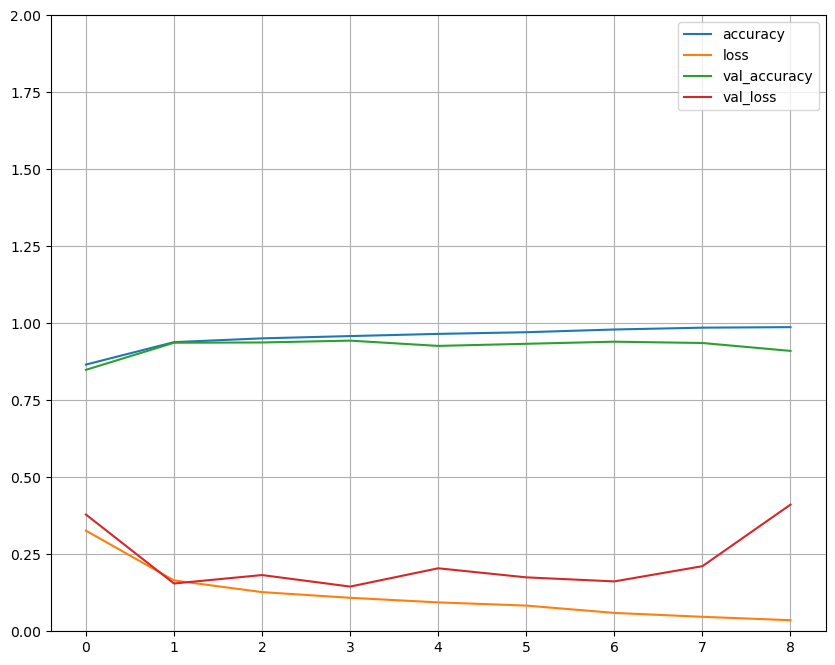

In [8]:
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0,2)

In [9]:
model.evaluate(x_test,y_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9439 - loss: 0.1430


[0.1329754889011383, 0.9436860084533691]

37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step


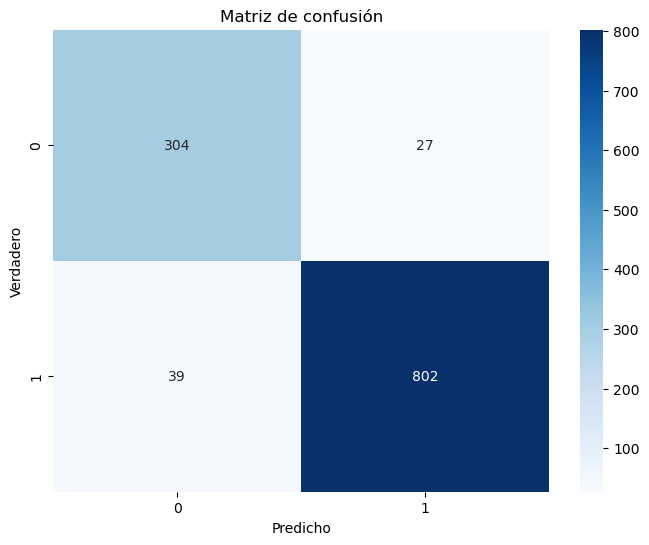

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

x_nuevas = x_test
y_nuevas_pred = model.predict(x_nuevas)
cm = confusion_matrix(y_test, y_nuevas_pred.round(0))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.title('Matriz de confusión')
plt.show()